In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
ruta_archivo = r"C:\Users\Alejandro\Downloads\cars.csv"

# Especifica el delimitador y omite las filas con datos no válidos al final
df = pd.read_csv(ruta_archivo)

In [146]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [147]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [148]:
df1 = df[['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable']]

In [170]:
df_transmission = df['transmission'].value_counts()
colors = []

for transmission, count in df_transmission.items():
    if transmission == 'mechanical':
        colors.append('red')
    elif transmission == 'automatic':
        colors.append('green')

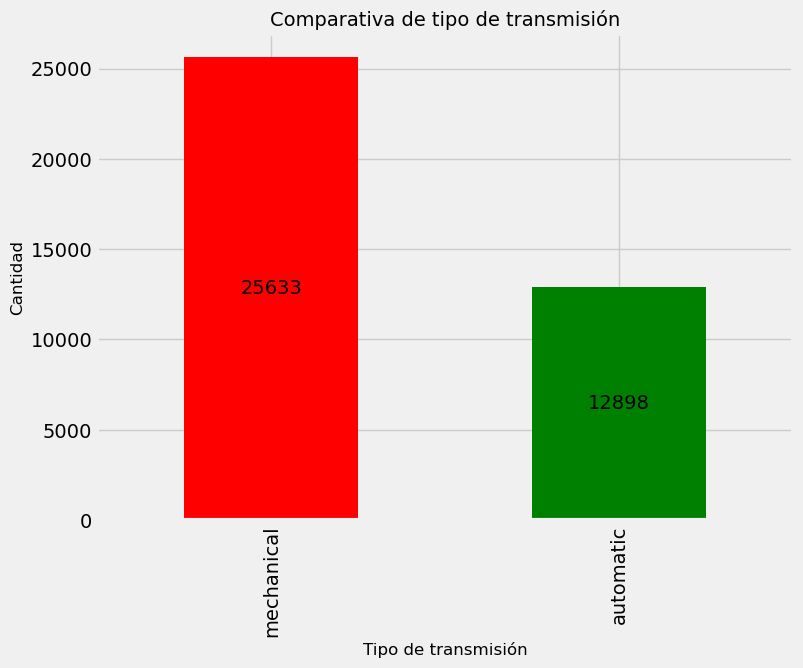

In [150]:
#comparación del tipo de transmisión de los autos

ax = df_transmission.plot(kind='bar', figsize=(8, 6), color=colors)

ax.set_xlabel('Tipo de transmisión', fontsize=12)
ax.set_ylabel('Cantidad', fontsize=12)
ax.set_title('Comparativa de tipo de transmisión', fontsize=14)

for container in ax.containers:
   ax.bar_label(container, fmt='%.0f', label_type='center')

plt.show()

<Axes: title={'center': 'Comparativa de tipo de transmisión'}, ylabel='count'>

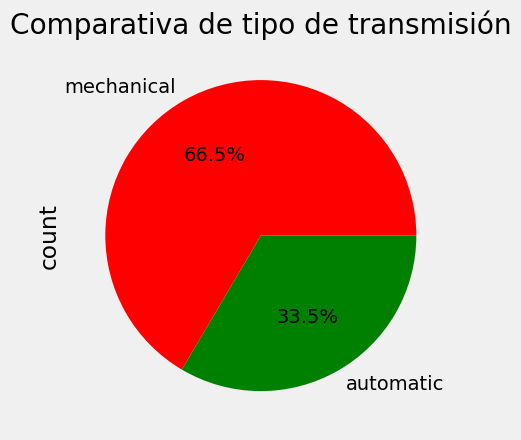

In [151]:
df_transmission.plot(kind='pie', title='Comparativa de tipo de transmisión', colors=colors, autopct='%0.1f%%')


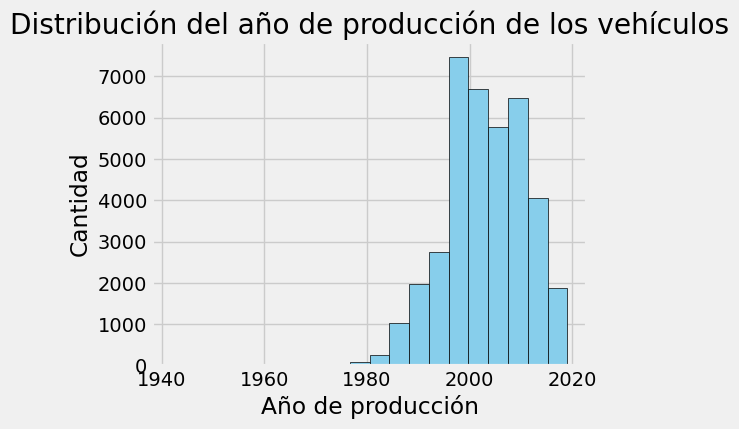

In [152]:
plt.figure(figsize=(5, 4))
plt.hist(df['year_produced'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del año de producción de los vehículos')
plt.xlabel('Año de producción')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

In [153]:
transmission_fuel_table = pd.crosstab(df['transmission'], df['engine_fuel'])

In [154]:
transmission_fuel_table

engine_fuel,diesel,electric,gas,gasoline,hybrid-diesel,hybrid-petrol
transmission,,,,,,
automatic,3153,10,513,9005,1,216
mechanical,9719,0,834,15060,1,19


In [155]:
print(f"The highest odometer value: {df['odometer_value'].max()} km")

The highest odometer value: 1000000 km


In [169]:
#porcentaje del tipo de transmisión de los autos con 1.000.000Km
max_odometer_value = df['odometer_value'].max()
max_odometer_cars = df[df['odometer_value'] == max_odometer_value]

automatic_count = max_odometer_cars[max_odometer_cars['transmission'] == 'automatic'].shape[0]
mechanical_count = max_odometer_cars[max_odometer_cars['transmission'] == 'mechanical'].shape[0]
total_cars = max_odometer_cars.shape[0]

automatic_percentage = (automatic_count / total_cars) * 100
mechanical_percentage = (mechanical_count / total_cars) * 100

print(f"Porcentaje transmisión automática: {automatic_percentage}%")
print(f"Porcentaje transmisión mecánica: {mechanical_percentage}%")
print(f"total: {automatic_percentage + mechanical_percentage}%")

Porcentaje transmisión automática: 11.728395061728394%
Porcentaje transmisión mecánica: 88.27160493827161%
total: 100.0%


Clase de auto más común: sedan


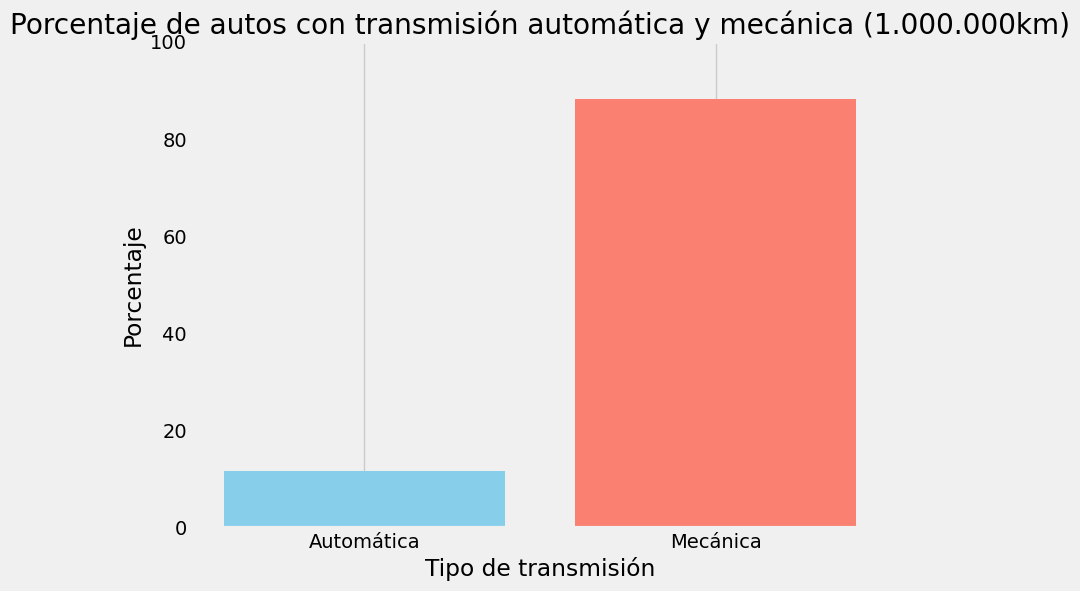

In [168]:
# Calcular la clase de auto más común
common_body_type = max_odometer_cars['body_type'].mode()[0]
print("Clase de auto más común:", common_body_type)

# Visualización de los resultados
labels = ['Automática', 'Mecánica']
percentages = [automatic_percentage, mechanical_percentage]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['skyblue', 'salmon'])
plt.title('Porcentaje de autos con transmisión automática y mecánica (1.000.000km)')
plt.xlabel('Tipo de transmisión')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

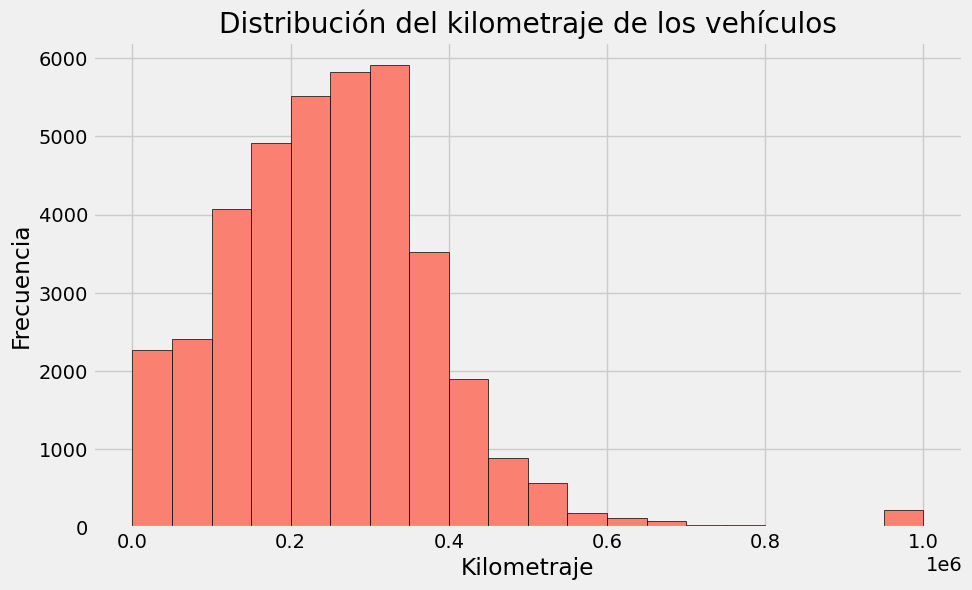

In [157]:
#Histograma del kilometraje de los vehículos:
plt.figure(figsize=(10, 6))
plt.hist(df['odometer_value'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución del kilometraje de los vehículos')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [158]:
df['body_type'].value_counts()

body_type
sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: count, dtype: int64

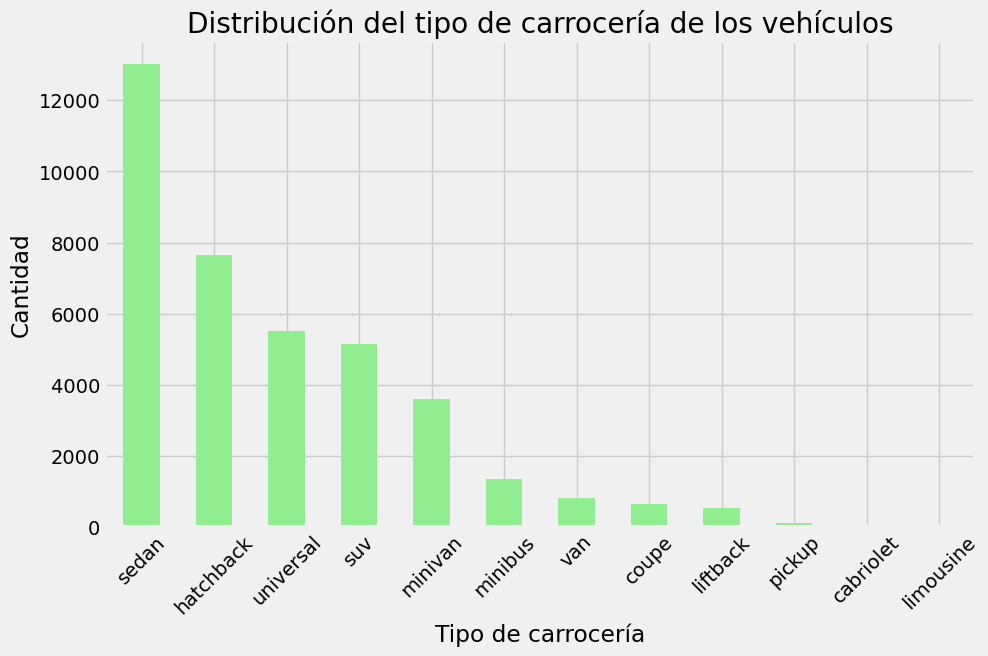

In [159]:
#Tipo de carrocería:
plt.figure(figsize=(10, 6))
df['body_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución del tipo de carrocería de los vehículos')
plt.xlabel('Tipo de carrocería')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [160]:
#porcentaje de vehículos con garantía:
warranty_proportion = df['has_warranty'].value_counts(normalize=True) * 100

In [161]:
warranty_proportion.round(2)

has_warranty
False    98.83
True      1.17
Name: proportion, dtype: float64

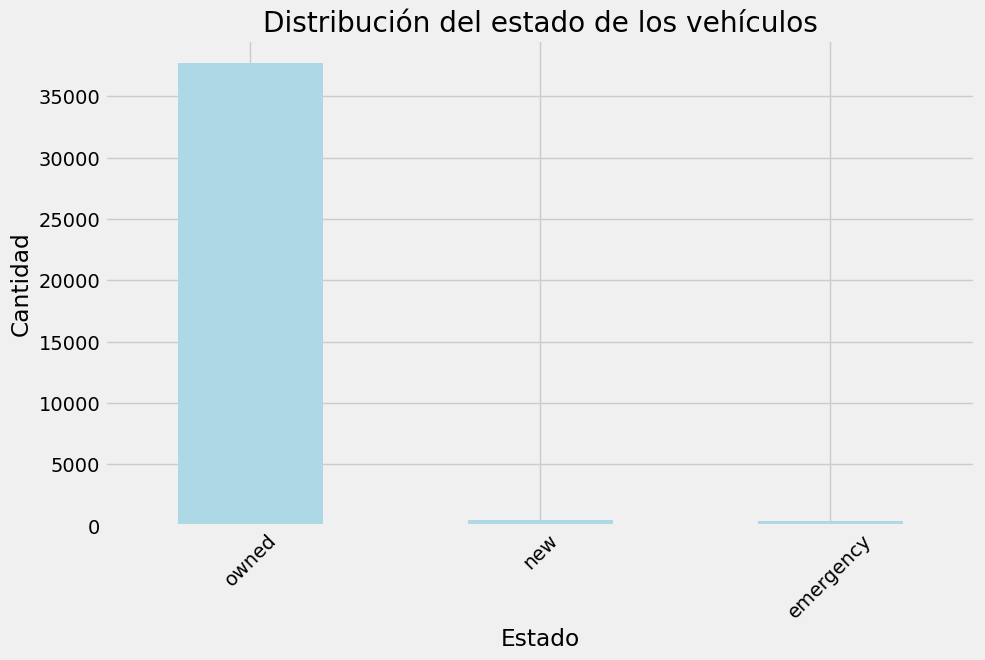

In [162]:
#distribución de estado del vehículo:
plt.figure(figsize=(10, 6))
df['state'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribución del estado de los vehículos')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()